# Introduction to Deep Learning with TensorFlow and Keras

Welcome to Notebook 5 of the **Python for Data Science** course! In this notebook, we will explore **deep learning** techniques using **TensorFlow** and **Keras**. Deep learning has become a powerful tool for analyzing complex data, including images, sequences, and signals, such as those found in neuroscience.

---

## 1. Introduction to TensorFlow and Keras

TensorFlow is an open-source library for machine learning and deep learning. Keras is a high-level API for building and training deep learning models that runs on top of TensorFlow.

### 1.1. Installing TensorFlow

If TensorFlow is not installed, you can install it using pip.

In [1]:
# Install TensorFlow if it's not already installed
%pip install tensorflow
%pip install setuptools


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 1.2. Importing TensorFlow and Keras

Let's import TensorFlow and Keras, and check their versions.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


---

## 2. Working with Data

We'll use the MNIST dataset, a classic dataset for image classification tasks. This dataset consists of handwritten digits and is commonly used for benchmarking deep learning models.

### 2.1. Loading the MNIST Dataset

We'll load and preprocess the MNIST dataset.

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


### 2.2. Visualizing the Data

Let's visualize some samples from the MNIST dataset to get a sense of what the data looks like.


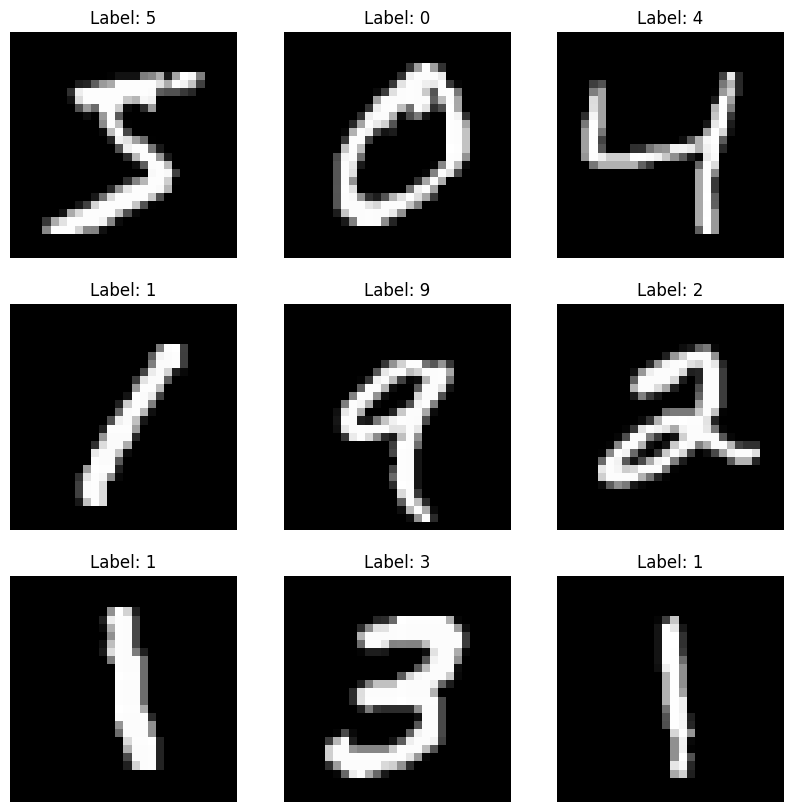

In [4]:
import matplotlib.pyplot as plt

# Visualize some samples from the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()


---

## 3. Building and Training a Deep Learning Model

We'll build a simple Convolutional Neural Network (CNN) for classifying MNIST digits. CNNs are particularly effective for image data.

### 3.1. Building the Model

We'll create a CNN using Keras.


In [5]:
# Build the CNN model
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/Users/markshteyn/Library/Caches/pypoetry/virtualenvs/neurotech-curriculum-GDeaBtn4-py3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### 3.2. Training the Model

We'll train the CNN on the MNIST dataset and evaluate its performance.


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 192s 250ms/step - accuracy: 0.8529 - loss: 0.4910 - val_accuracy: 0.9807 - val_loss: 0.0638
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 198s 264ms/step - accuracy: 0.9807 - loss: 0.0591 - val_accuracy: 0.9877 - val_loss: 0.0441
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 232s 309ms/step - accuracy: 0.9863 - loss: 0.0413 - val_accuracy: 0.9827 - val_loss: 0.0613
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1966s 3s/step - accuracy: 0.9908 - loss: 0.0325 - val_accuracy: 0.9881 - val_loss: 0.0396
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 816s 1s/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9884 - val_loss: 0.0397
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.9862 - loss: 0.0379
Test accuracy: 0.9897000193595886


### 3.3. Visualizing Training Performance

Let's plot the training and validation accuracy and loss to understand how well the model performed during training.


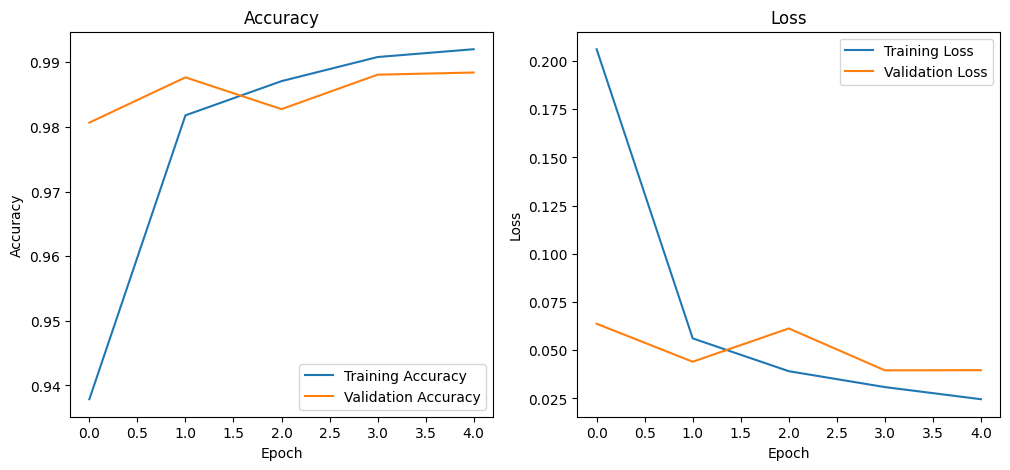

In [7]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 4.1. Generating Synthetic EEG Data

In this section, we will create synthetic EEG data for two mental states. We'll simulate EEG signals as 1D time-series data with added noise, representing different states. This will allow us to apply deep learning techniques to this data.

In [8]:
import numpy as np
import pandas as pd

# Parameters for synthetic EEG data
n_samples = 1000
n_channels = 64  # Number of EEG channels
n_time_points = 128  # Number of time points in each EEG signal

# Generate synthetic EEG signals
def generate_eeg_signal(label, n_samples, n_channels, n_time_points):
    if label == 0:
        # Relaxed state: sinusoidal signals with noise
        return np.sin(np.linspace(0, 2 * np.pi, n_time_points)) + 0.5 * np.random.randn(n_samples, n_channels, n_time_points)
    elif label == 1:
        # Focused state: cosine signals with noise
        return np.cos(np.linspace(0, 2 * np.pi, n_time_points)) + 0.5 * np.random.randn(n_samples, n_channels, n_time_points)

# Generate data for two classes
eeg_data_relaxed = generate_eeg_signal(0, n_samples // 2, n_channels, n_time_points)
eeg_data_focused = generate_eeg_signal(1, n_samples // 2, n_channels, n_time_points)

# Combine and create labels
X = np.vstack((eeg_data_relaxed, eeg_data_focused))
y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

print("Synthetic EEG data shape:", X.shape)
print("First sample shape:", X[0].shape)
print("First five labels:", y[:5])


Synthetic EEG data shape: (1000, 64, 128)
First sample shape: (64, 128)
First five labels: [0 1 0 0 1]


### 4.2. Preparing the Data for Deep Learning

We need to preprocess the synthetic EEG data and split it into training and testing sets. We'll also prepare the data for input into a Convolutional Neural Network (CNN).



In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Preprocess the data
X = X.reshape((X.shape[0], n_channels, n_time_points, 1))  # Add channel dimension
y = to_categorical(y, 2)  # One-hot encode the labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (700, 64, 128, 1)
Testing data shape: (300, 64, 128, 1)


### 4.3. Building and Training a Deep Learning Model

We will now build and train a Convolutional Neural Network (CNN) on the synthetic EEG data. The CNN will be designed to classify the two mental states based on the EEG signals.



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(n_channels, n_time_points, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/Users/markshteyn/Library/Caches/pypoetry/virtualenvs/neurotech-curriculum-GDeaBtn4-py3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 126, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,376,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,194 (5.46 MB)

 Trainable params: 1,432,194 (5.46 MB)

 Non-trainable params: 0 (0.00 B)

### 4.4. Training the Model

We'll train the CNN on the synthetic EEG data and evaluate its performance.

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.9263 - loss: 0.2563 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 573ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.0


### 4.5. Visualizing Training Performance

Let's plot the training and validation accuracy and loss to understand how well the model performed during training.



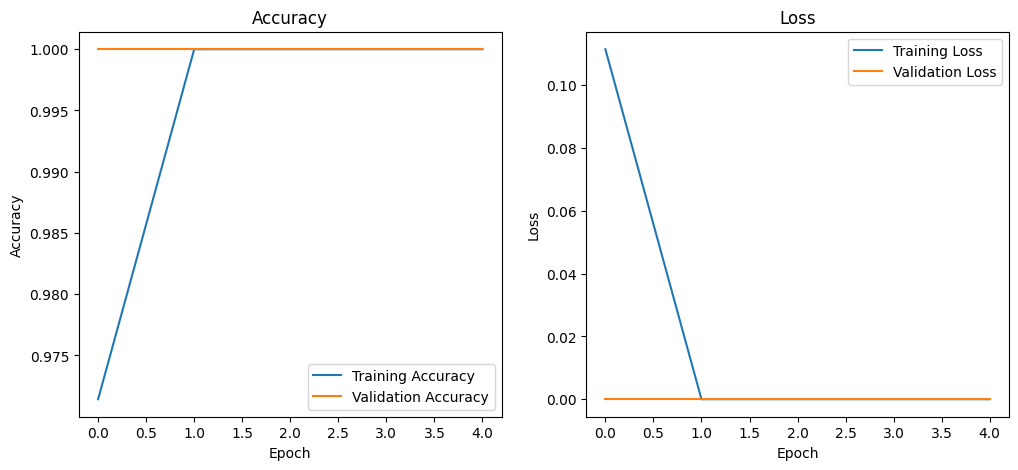

In [12]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


---

## 5. Summary and Next Steps

In this section, we generated synthetic EEG data, built and trained a Convolutional Neural Network (CNN) for classification, and visualized the model's performance. This example demonstrates how deep learning can be applied to EEG signals, and similar approaches can be used for real neuroscience data.

### Next Steps:

- Experiment with different CNN architectures and hyperparameters.
- Apply deep learning models to real EEG or MRI datasets.
- Explore advanced techniques such as transfer learning for improved model performance.

Keep applying these techniques to your projects and exploring new ways to analyze complex data!

---
